<a href="https://colab.research.google.com/github/CroydDS/ImersaoDados_Alura/blob/main/Imers%C3%A3o_Dados_Alura_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 1 da Imersão dados Alura

Importando a base de dados

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [ ]:
dados = "https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true"
df = pd.read_csv(dados, compression = "zip")

Análise exploratória dos dados

#Aula 02

In [34]:
df

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

Renomeando Colunas

In [35]:
mapa = {'droga': 'composto'}
df.rename(columns=mapa, inplace=True)

In [36]:
df.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [37]:
cod_compostos = df['composto'].value_counts().index[0:5]

Na célula acima, declaramos a variável ```cod_compostos``` e definimos a função que está atrelada à ela. 
E agora, executamos a nossa nova variável para verificar o resultado.

In [38]:
cod_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

Exitem algumas maneiras de filtrar uma base de dados e optamos em usar a função ```query``` do Pandas e, somente a título de curiosidade, essa função é bastante análoga ao SQL (linguagem de programação para bancos de dados).
A estrutura dela é bastante simplificada, precisamos apenas definir o dataframe, chamar a função e passar como parâmetro a condição que deve ser 
filtrada no nosso conjunto de dados.

Nesta parte do projeto, queremos realizar um filtro em nossos dados, selecionando apenas as linhas nas quais o composto esteja dentro da nossa lista ```cod_composto``` (lista que representa os 5 compostos mais testados no experimento) e vamos utilizar o método ```query``` para resolver este problema. 

Como parâmetro da função, passamos uma string contendo a lógica para realização da seleção dos dados. O que queremos é o seguinte: o ```query```precisa retornar para nós todas as linhas contendo os 5 compostos mais utilizados. Logo, a string necessária para isso é: ```composto in @cod_compostos```. 

Usamos ```composto``` porque essa é a coluna a ser verificada no dataframe e ```cod_compostos``` por ser a lista com os top 5 compostos, o detalhe aqui é que o ```@``` é necessário para informar o ```query``` que ```cod_composto``` é uma variável que já foi definida fora da função.

In [63]:
df.query('composto in @cod_compostos')

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.6840,-2.4390,-0.1427,...,-10.0000,-9.5910,-10.0000,-10.0000,-8.5110,-10.0000,-10.0000,-10.0000,-10.0000,-8.8870,-10.0000,-10.0000,-10.0000,-10.0000,-4.9020,-9.9840,-5.5520,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.7960,-8.1770,-9.8990,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,0.7535,0.5971,1.6350,-0.3146,0.4984,-1.1890,0.3772,-0.8196,0.1083,-2.0350,0.4135,0.7586,-0.4024,-0.0449,0.3335,0.2358,0.7919,-0.8775

Agora que vimos que a nossa filtragem funcionou e que temos como retorno uma base de dados com 3.235 linhas, podemos usar a função ```query```como parâmetro para o ```countplot```, o nosso gráfico de barras.
O ```countplot``` é um gráfico pré-programado da biblioteca ```Seaborn```e, por isso, precisaremos fazer a importação padrão da mesma (```import seaborn as sns```). Adicionalmente, aqui no Google Colaboratory, para que possamos enxergar o gráfico com os padrões de configuração da biblioteca, precisamos rodar ```sns.set()```.
Além disso, para refinar a apresentação do gráfico, podemos utilizar algumas funcionalidades da biblioteca ```Matplotlib``` (fazendo, primeiramente, sua importação - ```import matplotlib.pyplt as plt```).
Também estamos definindo o tamanho do gráfico através da função ```figure``` e seu parâmetro ```figsize=(x, y))``` e o título através do ```set_title('Título')```.
Como comentado na aula, usualmente, armazenamos o nosso gráfico em uma variável ```ax``` e então, definimos as demais configurações (por exemplo, ```ax.set_title('Título')```.
E, finalmente, para visualizar o gráfico de barras, usamos o ```plt.show()```.

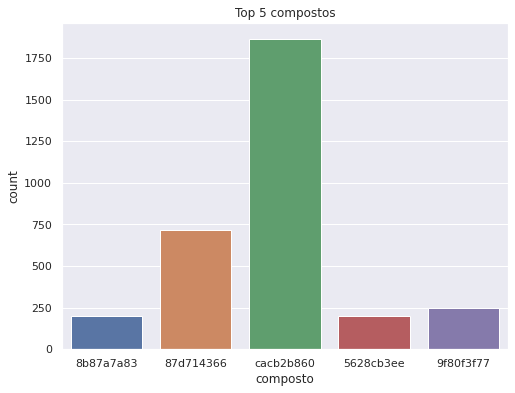

In [49]:
sns.set()
plt.figure(figsize =(8,6))
ax = sns.countplot(x = 'composto', data=df.query('composto in @cod_compostos'))
ax.set_title('Top 5 compostos')
plt.show()

Até o momento analisamos os dados de tempo, dose, compostos e afins. Entretanto, não analisamos os dados de expressões gênicas (G's) e viabilidade celular (C's). Será que podemos criar um gráfico de barras para esses dados?
Vamos pensar que a nossa base de dados apresenta mais de 3.000 compostos. Mas quantos desses compostos aparecem na coluna ```g-0```? 
Para responder essa questão, vamos usar a função ```unique()``` do Pandas que conta os valores únicos presentes na coluna em questão. Como resposta padrão, o retorno será uma lista com arrays (os nomes dos compostos) mas, nosso objetivo é saber o tamanho dessa lista e, por isso, usamos o ```len```, pois assim, ele contará o tamanho desta lista de arrays.

In [27]:
len(df['g-0'].unique())

14367

Como temos diversos compostos únicos dentro da coluna ```g-0```, não é viável que façamos o mesmo gráfico utilizado anteriormente. 
Por isso, precisamos traçar uma nova estratégia para visualizar os nossos dadose aqui, usaremos um histograma.
O primeiro passo, é identificar qual o valor mínimo (```min()```) e o valor máximo (```max()```) para entender qual o intervalo númerico com o qual estamos trabalhando.

In [ ]:
df['g-0'].min()

-5.513

In [ ]:
df['g-0'].max()

10.0

Depois que reconhecemos que o nosso intervalo vai de ~5,5 a 10,0, podemos partir para o histograma e a função que usaremos para plotar é do Pandas (```dataframe['variável'].hist()```).
Assim que rodamos essa função, percebemos que a visualização destes dados ainda não está boa pois, a divisão padrão das barras do histograma, representam intervalos muito grandes que atrapalham o entendimento dos dados.
Por isso, acresentamos um parâmetro dentro da função ```(bins = número de quebras)``` para melhor dividir e, consequentemente visualizar os dados.
Quando definimos os bins em 100, podemos perceber que a forma se aproxima bastante de uma curva bastante conhecida: a curva normal.

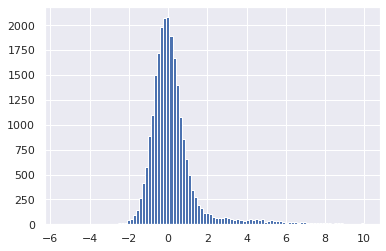

In [ ]:
df['g-0'].hist(bins = 100)

Aqui, estamos testando o mesmo histograma para outro gene, o ```g-19```. E queremos fazer uma comparação entre os gráficos e podemos fazer algumas considerações sobre ambos os gráficos.
Percebemos, por exemplo, que a imagem seguem a mesma tendência de curva mas há um deslocamento para a direita.

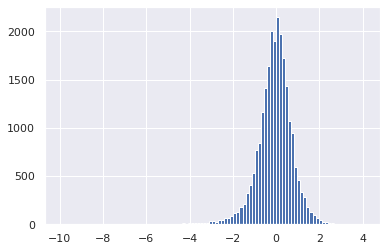

In [ ]:
df['g-19'].hist(bins = 100)

Como concluimos que plotar os gráficos de todos os genes é inviável, vamos analisar resumidamente algumas estatísticas sobre eles. 
Para isso, vamos usar a função ```describe``` do Pandas que já calcula e descreve algumas estatísticas importantes para o entendimento dos dados (contagem, média, desvio padrão, mínimo, alguns quartis e máximo).


In [ ]:
df.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.4

Neste ponto, vamos separar as variáveis que queremos analisar da base de dados (exemplo: ```g-0``` e ```g-1```) através de uma lista de arrays.
Entretanto, apesar desta ser uma ótima estratégia para a separação, temos 771 genes e escrevê-los um a um seria muito trabalhoso e podemos fazer de uma outra forma.

In [ ]:
df[['g-0', 'g-1']]

,g-0,g-1
0,1.0620,0.5577
1,0.0743,0.4087
2,0.6280,0.5817
3,-0.5138,-0.2491
4,-0.3254,-0.4009
...,...,...
23809,0.1394,-0.0636
23810,-1.3260,0.3478
23811,0.3942,0.3756
23812,0.6660,0.2324


Uma estratégia mais direta em que não precisaremos escrever a lista gene a gene, é o uso da função ```loc[]``` do Pandas.
Como argumentos, passamos primeiramente o ```:```, os dois pontos faz com que o ```loc[]```retorne todos os elementos de uma determinada coluna, isso é importante quando não sabemos qual a quantidade de linhas de um dataframe. E, o segundo elemento, passamos as colunas que são de nosso interesse. No caso, queremos que a função nos retorne todos os elementos das colunas ```g-0```até ```g-771```.
E, por fim, podemos declarar a nossa função de interesse a partir deste filtro realizado nos dados, o ```describe()```.

In [ ]:
df.loc[:,'g-0':'g-771'].describe()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950

Apesar do describe reunir as nossas estatísticas de interesse, é bastante complexo analisar o dataframe resposta. Para facilitar o nosso entendimento, vamos plotar histogramas que nos ajudaram na visualização das estatísticas de todas as colunas selecionadas.
Olhando o dataframe original, anteriormente, fizemos o histograma de apenas uma coluna. Mas agora, nosso conjunto de dados de interesse é o ```describe()``` que fizemos a partir do ```loc[]``` e, deste ponto de vista, não queremos mais fazer o histograma coluna a coluna (genes), queremos que ele seja a partir das linhas (estatísticas). Por isso, vamos transpor as linhas e colunas (transformar as linhas em colunas e vice-versa).
Para isso, vamos usar o ```.T[]``` no código anterior que produzimos para organizar o ```describe()```.
Ou seja, vamos manter todo o código até o ```describe()``` e, ao final, acrescentaremos o ```.T[]```. Mas, ao rodarmos essa linha, percebemos que temos como devolutiva o mesmo dataframe mas transposto. E, como aqui, nosso interesse é produzir histogramas, acrescentamos como argumento do ```.T[]``` a estatística alvo (```.T['estatística']```) e, por último, acrescentamos o ```.hist(bins = número de quebras)``` para que o histograma seja observado.



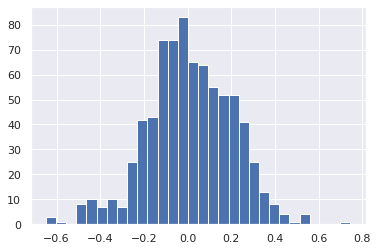

In [ ]:
df.loc[:,'g-0':'g-771'].describe().T['mean'].hist(bins=30)

A seguir, reproduzimos o código acima apenas alterando o parâmetro estatístico a ser analisado (mínimo e máximo, por exemplo). 
E assim, podemos perceber as nuances de cada métrica.

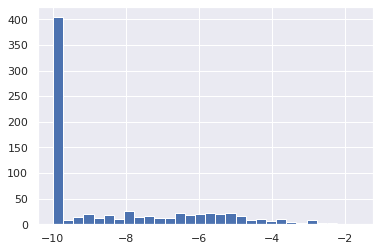

In [ ]:
df.loc[:,'g-0':'g-771'].describe().T['min'].hist(bins=30)

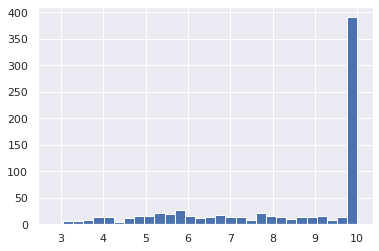

In [ ]:
df.loc[:,'g-0':'g-771'].describe().T['max'].hist(bins=30)

É muito interessante que a gente replique a análise desenvolvida para os ```genes (g)```, nos ```tipos celulares (c)```. 
Por isso, vamos copiar a linha de código que produz os histogramas mas aqui, vamos modificar o argumento ```loc[:,'g-0':'g-771'] -> loc[:,'c-0':'c-99']``` e a quantidade de bins ```hist(bins=100) -> hist(bins=50)```.

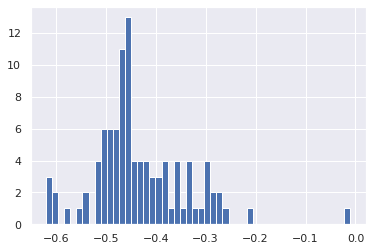

In [ ]:
df.loc[:,'c-0':'c-99'].describe().T['mean'].hist(bins=50)

Um outro tipo de gráfico super interessante e útil é o boxplot. 
Para visualizá-lo, vamos usar a função ```boxplot```do Seaborn e, como argumentos dessa função vamos passar um ```x```, onde ```x = coluna que será plotada neste eixo``` e a base de dados ```data = conjunto de dados```.
O boxplot apresenta uma caixa no meio onde podemos identificar a mediana (linha no meio da caixa que é o ponto onde metade dos dados estão na direita e a outra metade para a esquerda), os outliers (pontos acima ou abaixo do eixo principal do gráfico que representam valores discrepantes para mais ou para menos), a maior concentração dos dados (caixa principal que representa onde está a mior parte dos dados - primeiro quartil (25%) e terceiro quartil (75%)) e os máximos e mínimos desconsiderando os outliers (linhas laterais à caixa principal).
O boxplot é uma importante ferramenta na visualização de dados porque em apenas um gráfico, podemos identificar várias métricas estatísticas.

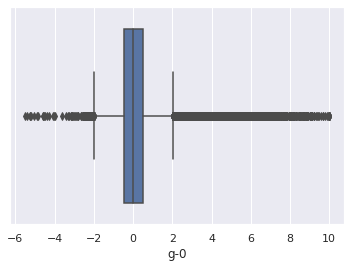

In [ ]:
sns.boxplot(x='g-0' , data=df)

Podemos também, além de definir apenas os dados que irão no eixo x, definimos os dados para o outro eixo, atribuindo um valor para o parâmetro ```y``` (```y = variável que vai ser plotada neste eixo```).
Como podemos perceber, no boxplot que representa o ```tratamento = com_droga``` apresenta muitos outliers e isso gera uma discussão bastante interessante pois, do ponto de vista biológico a investigação desses pontos é importante mas, dependendo da área que estamos trabalhando, esse ponto pode apresentar outras soluções. 
Dito isso, é importante para um cientista de dados não só entender e manipular a base de dados mas também saber acerca do negócio que estamos tratando.

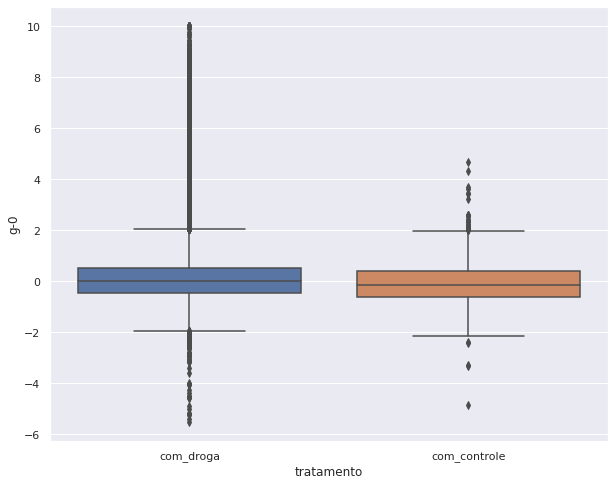

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g-0', x='tratamento' , data=df)


##Aula2

###Desafio 01/02: Ordenar o gráfico countplot, Melhorar a visualização alterando tamanho da fonte...


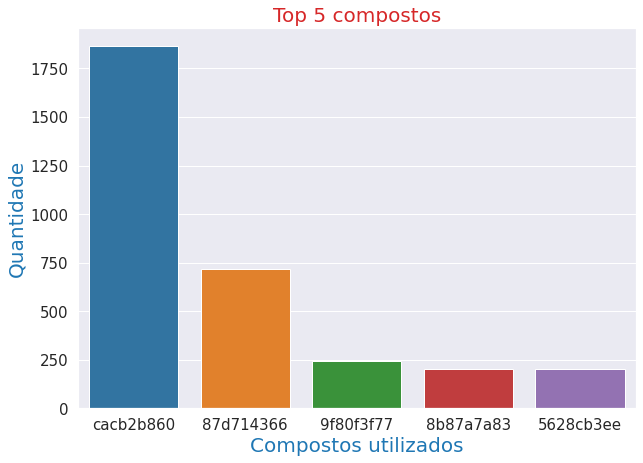

In [139]:
sns.set()
plt.figure(figsize =(10,7))
ax = sns.countplot(x = 'composto', data=df.query('composto in @cod_compostos'),order = cod_compostos, palette= "tab10")
ax.set_title('Top 5 compostos',fontsize = "20",color = "tab:Red")
ax.set_ylabel("Quantidade", fontsize = 20, color = "tab:blue")
ax.set_xlabel("Compostos utilizados", fontsize = 20, color = "tab:blue")
plt.yticks(fontsize = 15)
plt.xticks( fontsize = 15 );


###Desafio 03: Plotar os histogramas com seaborn



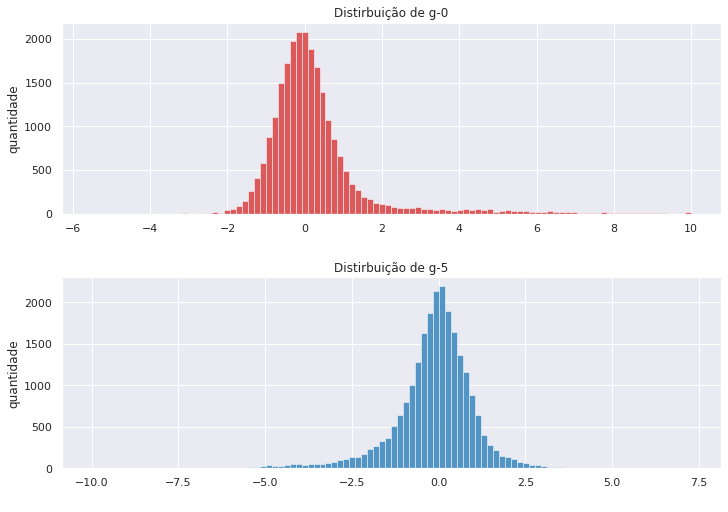

In [126]:
fig, ax = plt.subplots(2, constrained_layout=True, figsize =(10,7))

hist1 = sns.histplot(data = df, x = 'g-0', bins = 100,ax=ax[0], color = "tab:red")
ax[0].set(ylabel = "Quantidade",xlabel =" ", title = "Distirbuição de g-0")

hist2 = sns.histplot(data = df, x = 'g-5', bins = 100, ax=ax [1],color = "tab:blue")
ax[1].set(ylabel= "Quantidade", xlabel = " ", title = "Distirbuição de g-5");

Podemos notar que apesar de ambas as distribuições se apresentarem como uma distirbuição normal, o g-0 possui um desvio maior para valores positivos, enquanto o g-5 possui uma distribuição com desvios para valores negativos

###Desafio 04: Estudar sobre as estatíticas retornadas no .describe()


A função .describe() do pandas é utilizada para retornar dados estatísticos de uma ou mais séries numericas de um dataframe do Pandas.
Esses dados são: 

Count: retorna uma contagem (quantidade) de valores não nulos para determinada coluna de um data frame

Mean/média: retorna a média aritimética;

std/desvio padrão: retorna o valor do desvio padrão;

min: retorna o valor mínimo encontrado na coluna;

25%: Representa o valor que divide o primeiro quartil dos valores da coluna ;

50%:Retorna a mediana;

75%: Representa o valor que divide o terceiro quartil dos valores da coluna;

max: retorna o valor máximo encontrado na coluna.



###Desafio 05: Refletir sobre a manipulação do tamanho das visualizações. 



A vizualização dos dados são um resumo das informações que aqueles dados podem nos passar, porém os gráficos devem ser apresentados mantendo as proporções para evitar disotorções que podem causar uma interpretação equivocada.


###Desafio 06: Fazer outras análises com o boxplot e até com o histograma. 

In [240]:
df.head(10)

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
5,id_001762a82,com_droga,24,D1,e06749542,-0.6111,0.2941,-0.9901,0.2277,1.2810,0.5203,0.0543,-0.2225,-0.1586,0.4289,0.0361,0.3543,0.8310,-0.9129,0.7677,-0.2512,0.7087,0.0481,-0.4486,1.2570,1.2550,0.3359,-0.5103,-0.2993,-1.1950,-0.3208,-0.1187,1.0030,0.9133,0.0376,0.3015,-0.9578,0.5354,1.1360,1.1310,...,0.6701,2.0780,1.3350,0.9889,0.5017,2.0020,0.8918,0.4290,0.0716,0.8465,0.6596,1.3710,1.0580,1.7570,1.0030,0.2152,1.6920,-0.2930,1.4590,1.0950,0.5854,1.7270,0.5580,1.3090,1.0100,0.6980,0.5455,1.0170,1.2910,1.5430,1.8390,1.1570,-1.0120,1.9010,1.4270,0.4519,1.2120,

Boxplot comparando o comportamento de alguns genes em relação ao composto 'cacb2b860'

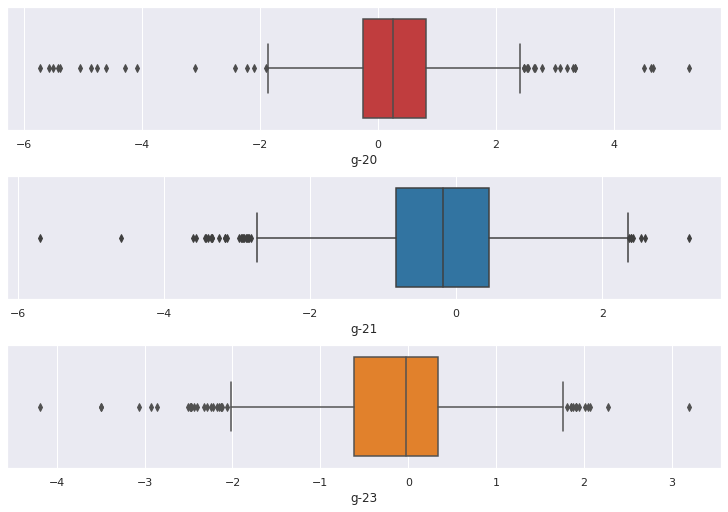

In [271]:
fig, ax = plt.subplots(3, constrained_layout=True, figsize =(10,7))
hist1 = sns.boxplot(data = df[df.composto == 'cacb2b860'], x = 'g-20',ax=ax[0], color = "tab:red")
hist2 = sns.boxplot(data = df[df.composto == 'cacb2b860'], x = 'g-21',ax=ax [1],color = "tab:blue")
hist2 = sns.boxplot(data = df[df.composto == 'cacb2b860'], x = 'g-23',ax=ax [2],color = "tab:orange");

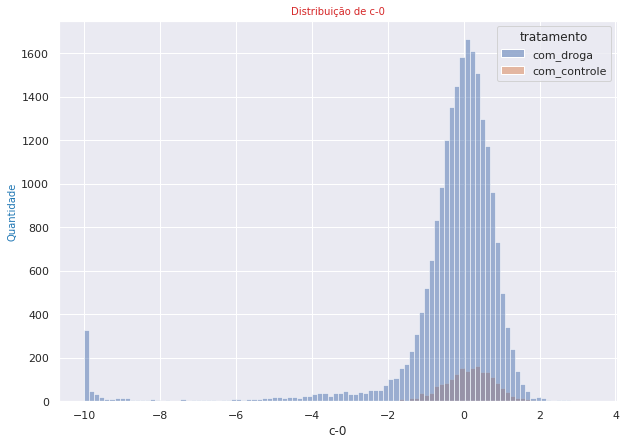

In [273]:
fig, ax = plt.subplots(figsize = (10,7))
sns.histplot(data = df, x = 'c-0', bins = 100,hue ='tratamento')
ax.set_title('Distribuição de c-0',fontsize = "10",color = "tab:Red")
ax.set_ylabel("Quantidade", fontsize = '10', color = "tab:blue");

Comparativo entre os genes que apresentam menor e maior desvio padrão

In [203]:
df_std = df.loc[:,'g-0':'g-771'].describe().T.sort_values('std',ascending=False)
df_std

,count,mean,std,min,25%,50%,75%,max
g-50,23814.0,-0.588018,2.256983,-10.000,-0.563700,0.01010,0.496875,4.889
g-75,23814.0,-0.445392,2.254701,-10.000,-0.546850,0.01000,0.529975,8.835
g-37,23814.0,-0.606710,2.200277,-10.000,-0.604100,-0.00070,0.460500,5.602
g-228,23814.0,-0.475231,2.163439,-10.000,-0.545400,0.01385,0.488375,10.000
g-100,23814.0,0.553186,2.152067,-5.915,-0.519275,-0.06260,0.544700,10.000
...,...,...,...,...,...,...,...,...
g-331,23814.0,0.072841,0.630456,-2.996,-0.253000,0.00140,0.299100,10.000
g-550,23814.0,-0.033976,0.623064,-5.238,-0.371700,0.00000,0.349675,3.669
g-104,23814.0,0.079709,0.621391,-3.138,-0.208800,0.00000,0.290300,10.000
g-307,23814.0,-0.131650,0.602029,-10.000,-0.265300,0.00000,0.000300,5.584


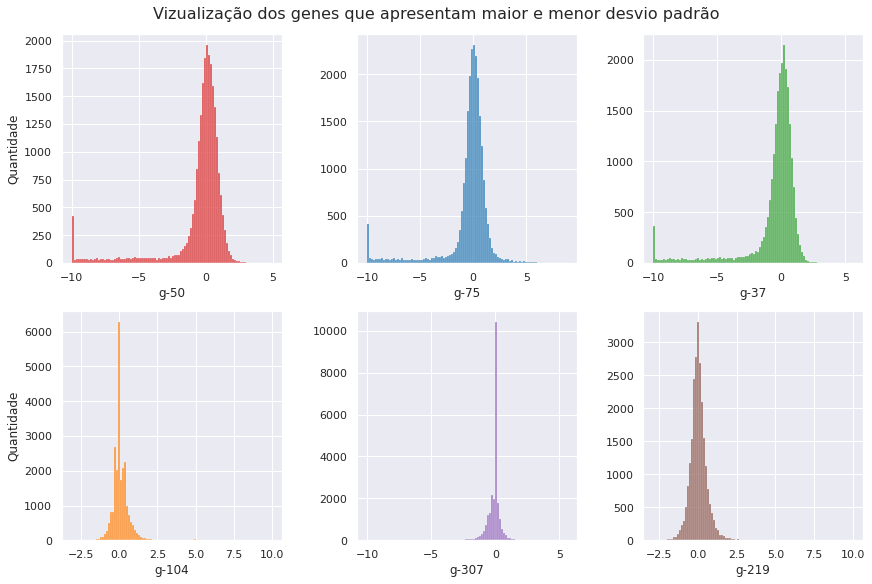

In [243]:
fig, ax = plt.subplots(2,3, constrained_layout=True, figsize =(12,8))
hist1 = sns.histplot(data = df, x = 'g-50', bins = 100,ax=ax[0,0], color = "tab:red")
hist2 = sns.histplot(data = df, x = 'g-75', bins = 100,ax=ax[0,1], color = "tab:blue")
hist3 = sns.histplot(data = df, x = 'g-37', bins = 100,ax=ax[0,2], color = "tab:green")
hist4 = sns.histplot(data = df, x = 'g-104', bins = 100,ax=ax[1,0], color = "tab:orange")
hist5 = sns.histplot(data = df, x = 'g-307', bins = 100, ax=ax [1,1],color = "tab:purple")
hist6 = sns.histplot(data = df, x = 'g-219', bins = 100, ax=ax [1,2],color = "tab:brown")
fig.suptitle('Vizualização dos genes que apresentam maior e menor desvio padrão', fontsize=16)
ax[0,0].set(ylabel= "Quantidade")
ax[0,1].set(ylabel= " ")
ax[0,2].set(ylabel= " ")
ax[1,2].set(ylabel= " ")
ax[1,1].set(ylabel= " ")
ax[1,0].set(ylabel= "Quantidade");

O perfil de distribuição dos genes com o maior desvio padrão é bem parecedio, apesar dos genes g-129, g307 e g104 possuírem o menor desvio padrão, eles também apresentam valores muito afastados da mediana da distribuição. 


###Desafio 07: Resumo do que você aprendeu com os dados

Neste novo desafo nos foi apresentadas uma nova ferramenta de visualização de dados a biblioteca seaborn. Essa biblioteca é uma das mais utilizadas para a análise exploratoria de dados (EDA) quando se trabalha com a linguagem python. 
Com graficos de box, histogramas e de distribuição normal é possivel ver que como as variáveis se correlacionam entre si, ou como seus valores estão distribuidos na base de dados. 
Algumas vizualizações já nos permitem ter insights de como determinado gene reaje ao tratamento com determinada droga e comparar com outros genes. 